In [228]:
import numpy as np
import matplotlib.pyplot as plt
import random

class Hopfield_Net():
    """
        - X is the input matrix where each column is a sample
        - W is a matrix of the weights.
        
    """
    def __init__(self, X):
        self.X = X
        self.D = X.shape[0] # Number of units
        self.N = X.shape[1] # Number of patterns
        self.Wrand = np.random.normal(0,1,(self.D,self.D))
        self.W = self.init_W()
        self.max_iter = 10
        self.iters = 0
        self.pattern_dict = self.init_dict()
        self.attractor_dict = self.pattern_dict.copy()
        self.update_type = 'syn'
        self.store_updates = []
    
    def init_W(self):
        W = np.zeros([self.D, self.D])
        for p in range(self.N):
            x = self.X[:,p]
            for i in range(self.D):
                for j in range(self.D):
                    W[i,j] += x[i]*x[j]
        W = W - np.diag(np.diag(W))
        return W
    
    def init_dict(self): # Dict of patterns as row vectors
        pattern_dict = {}
        for p in range(self.N):
            pattern = self.X[:,p].reshape(1, self.D)
            pattern_dict[p] = pattern
        return pattern_dict
    
    def update_rule(self, x): # x is a row vector
        #print("Before update {}".format(self.iters), x)
        for i in range(self.D):
            sum_term = 0
            for j in range(self.D):
                sum_term += self.W[i,j]*x[0,j]
            x[0,i] = np.sign(sum_term)
        #print("After update {}".format(self.iters), x)
        return x
    
    def random_update_rule(self, x):
        #print("Before update {}".format(self.iters), x)
        i = random.choice(list(range(1024)))
        sum_term = 0
        for j in range(self.D):
            sum_term += self.W[i,j]*x[0,j]
        x[0,i] = np.sign(sum_term)
        #print("After update {}".format(self.iters), x)
        return x
    
    def update_W(self, x): # x is a row vector
        for i in range(self.D):
            for j in range(self.D):
                self.W[i,j] += x.T[i]*x.T[j]
        self.W = self.W - np.diag(np.diag(self.W))
        self.N += 1
        self.pattern_dict[self.N-1] = x.reshape(1, self.D)
        return self.W
    
    def add_attractor(self, x):
        self.attractor_dict[len(self.attractor_dict.keys())] = x.reshape(1, self.D)
    
    def energy(self, x):
        E = 0
        for i in range(self.D):
            for j in range(self.D):
                E += self.W[i,j]*x[0,i]*x[0,j]
        return -E

    def net_out(self, x): # x is a row vector
        #self.W = self.update_W(x)
        #if np.array_equal(x, y):
        #y = np.sign(np.dot(self.W, x.T))
        if self.update_type == 'syn':
            y = self.update_rule(np.copy(x))
            self.store_updates.append(x)
        else:
            if self.iters % 1 == 0:
                self.store_updates.append(x) # Ta bort
            y = self.random_update_rule(np.copy(x))
        in_pattern_dict = [(y == pattern).all() 
                      for pattern in self.pattern_dict.values()]
        if any(in_pattern_dict):
            fixed_point = np.nonzero(in_pattern_dict)[0][0]
            print("Converged to X-row {} after {} iterations".format(fixed_point+1, self.iters+1))
            self.iters = 0
            return y
        elif np.array_equal(x, y) and self.update_type == 'syn':
            print("Stable after {}. Did not change after last iteration.".format(self.iters+1))
            in_attractor_dict = [(y == attractor).all() 
                      for attractor in self.attractor_dict.values()]
            if not any(in_attractor_dict):
                self.add_attractor(y)
            self.iters = 0
            return y
        elif self.iters <= self.max_iter:
            self.iters += 1
            if self.update_type == 'syn':
                return self.update_rule(self.net_out(np.copy(y)))
            else:
                return self.random_update_rule(self.net_out(np.copy(y)))
        else:
            print("Reached maximum number of iterations.")
            self.iters = 0
            return y
    
    #def number_of_atractors:
        
    
    #def train(self):
    #    for idx in range(self.N):
    #        x = X[:,idx].reshape([self.D, 1])
    #        y = net_out(x)


# 3.1 Convergence and attractors

In [212]:
x1 = np.array([[-1, -1, 1, -1, 1, -1, -1, 1]])
x2 = np.array([[-1, -1, -1, -1, -1, 1, -1, -1]])
x3 = np.array([[-1, 1, 1, -1, -1, 1, -1, 1]])

x4 = np.array([[-1, -1, 1, -1, -1, 1, -1, 1]])

In [213]:
X = np.concatenate((x1.T, x2.T, x3.T), axis = 1)

In [138]:
hop_net_1 = Hopfield_Net(x1.T)
hop_net_2 = Hopfield_Net(x2.T)
hop_net_3 = Hopfield_Net(x3.T)

In [139]:
hop_net_1.W + hop_net_2.W + hop_net_3.W

array([[ 0.,  1., -1.,  3.,  1., -1.,  3., -1.],
       [ 1.,  0.,  1.,  1., -1.,  1.,  1.,  1.],
       [-1.,  1.,  0., -1.,  1., -1., -1.,  3.],
       [ 3.,  1., -1.,  0.,  1., -1.,  3., -1.],
       [ 1., -1.,  1.,  1.,  0., -3.,  1.,  1.],
       [-1.,  1., -1., -1., -3.,  0., -1., -1.],
       [ 3.,  1., -1.,  3.,  1., -1.,  0., -1.],
       [-1.,  1.,  3., -1.,  1., -1., -1.,  0.]])

In [140]:
hop_net = Hopfield_Net(X)

In [141]:
hop_net.W

array([[ 0.,  1., -1.,  3.,  1., -1.,  3., -1.],
       [ 1.,  0.,  1.,  1., -1.,  1.,  1.,  1.],
       [-1.,  1.,  0., -1.,  1., -1., -1.,  3.],
       [ 3.,  1., -1.,  0.,  1., -1.,  3., -1.],
       [ 1., -1.,  1.,  1.,  0., -3.,  1.,  1.],
       [-1.,  1., -1., -1., -3.,  0., -1., -1.],
       [ 3.,  1., -1.,  3.,  1., -1.,  0., -1.],
       [-1.,  1.,  3., -1.,  1., -1., -1.,  0.]])

In [142]:
hop_net.net_out(np.copy(x4))

Converged to X-row 3 after 1 iterations


array([[-1,  1,  1, -1, -1,  1, -1,  1]])

In [143]:
x1d = np.array([[1, -1, 1, -1, 1, -1, -1, 1]])
x2d = np.array([[1, 1, -1, -1, -1, 1, -1, -1]])
x3d = np.array([[1, 1, 1, -1, 1, 1, -1, 1]])

In [144]:
x4d = np.array([[1, 1, -1, 1, 1, 1, -1, -1]]) #np.array([[-1, -1, 1, -1, 1, -1, -1, 1]])
#x2d = np.array([[1, 1, -1, -1, -1, 1, -1, -1]]) #np.array([[-1, -1, -1, -1, -1, 1, -1, -1]])
#x3d = np.array([[1, -1, -1, -1, -1, 1, -1, 1]]) #np.array([[-1, 1, 1, -1, -1, 1, -1, 1]])

In [145]:
hop_net.net_out(np.copy(x3d))

Converged to X-row 3 after 2 iterations


array([[-1,  1,  1, -1, -1,  1, -1,  1]])

In [146]:
hop_net.attractor_dict

{0: array([[-1, -1,  1, -1,  1, -1, -1,  1]]),
 1: array([[-1, -1, -1, -1, -1,  1, -1, -1]]),
 2: array([[-1,  1,  1, -1, -1,  1, -1,  1]])}

In [147]:
x4

array([[-1, -1,  1, -1, -1,  1, -1,  1]])

In [148]:
for i1 in [-1, 1]:
    for i2 in [-1, 1]:
        for i3 in [-1, 1]:
            for i4 in [-1, 1]:
                for i5 in [-1, 1]:
                    for i6 in [-1, 1]:
                        for i7 in [-1, 1]:
                            for i8 in [-1, 1]:
                                xRun = np.array([i1,i2,i3,i4,i5,i6,i7,i8]).reshape(1,8)
                                hop_net.net_out(np.copy(xRun))
                                
    
    

Converged to X-row 2 after 1 iterations
Converged to X-row 1 after 1 iterations
Stable after 2. Did not change after last iteration.
Converged to X-row 1 after 1 iterations
Converged to X-row 2 after 1 iterations
Converged to X-row 3 after 2 iterations
Converged to X-row 2 after 1 iterations
Converged to X-row 3 after 1 iterations
Converged to X-row 1 after 1 iterations
Converged to X-row 1 after 1 iterations
Stable after 2. Did not change after last iteration.
Stable after 3. Did not change after last iteration.
Converged to X-row 2 after 1 iterations
Converged to X-row 3 after 2 iterations
Stable after 3. Did not change after last iteration.
Converged to X-row 3 after 2 iterations
Stable after 2. Did not change after last iteration.
Converged to X-row 1 after 1 iterations
Stable after 3. Did not change after last iteration.
Stable after 2. Did not change after last iteration.
Converged to X-row 2 after 1 iterations
Converged to X-row 3 after 1 iterations
Stable after 2. Did not chang

In [149]:
hop_net.attractor_dict #18 attractors

{0: array([[-1, -1,  1, -1,  1, -1, -1,  1]]),
 1: array([[-1, -1, -1, -1, -1,  1, -1, -1]]),
 2: array([[-1,  1,  1, -1, -1,  1, -1,  1]]),
 3: array([[ 1, -1, -1,  1,  1, -1,  1, -1]]),
 4: array([[ 1,  1,  1,  1,  1, -1,  1,  1]]),
 5: array([[ 1,  1, -1,  1, -1,  1,  1, -1]])}

In [150]:
hop_net.pattern_dict

{0: array([[-1, -1,  1, -1,  1, -1, -1,  1]]),
 1: array([[-1, -1, -1, -1, -1,  1, -1, -1]]),
 2: array([[-1,  1,  1, -1, -1,  1, -1,  1]])}

# 3.2 Sequential update

In [2]:
pict = [i.split(',') for i in open("pict.dat").readlines()]

In [3]:
int_pict = [int(i) for i in pict[0]]

In [4]:
all_pics = [int_pict[i:i + 1024] for i in range(0, len(int_pict), 1024)]

In [5]:
p1 = all_pics[0]

In [6]:
p1 = np.array([all_pics[0]])
p2 = np.array([all_pics[1]])
p3 = np.array([all_pics[2]])
p4 = np.array([all_pics[3]])
p5 = np.array([all_pics[4]])
p6 = np.array([all_pics[5]])
p7 = np.array([all_pics[6]])
p8 = np.array([all_pics[7]])
p9 = np.array([all_pics[8]])
p10 = np.array([all_pics[9]])
p11 = np.array([all_pics[10]])

In [7]:
def disp_pic(pic):
    pic = pic[0].tolist()
    start = 0
    for row_id in range(32):
        end = start + 32
        row = pic[start:end]
        for col_id, pix in enumerate(row):
            if pix == 1:
                plt.plot(row_id, col_id, 'o', color = 'black')
            else:
                plt.plot(row_id, col_id, 'o', color = 'whitesmoke')
        start = end
        

In [8]:
#disp_pic(p10)

In [9]:
p1.shape

(1, 1024)

In [10]:
X = np.concatenate((p1.T, p2.T, p3.T), axis = 1)
#X = np.concatenate((p1.T, p2.T), axis = 1)

In [160]:
X.shape

(1024, 3)

In [221]:
hop_net = Hopfield_Net(X)

Reached maximum number of iterations.


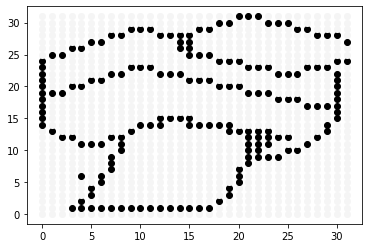

In [207]:
disp_pic(hop_net.net_out(p10))

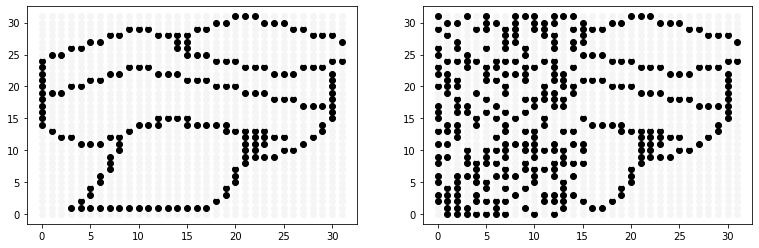

In [202]:
plt.figure(figsize = (13, 4))
plt.subplot(1, 2, 1)
disp_pic(p1)
plt.subplot(1, 2, 2)
disp_pic(p10)

In [163]:
new_pic = np.copy(hop_net.net_out(np.copy(p10)))

Stable after 3. Did not change after last iteration.


In [164]:
new_pic.shape

(1, 1024)

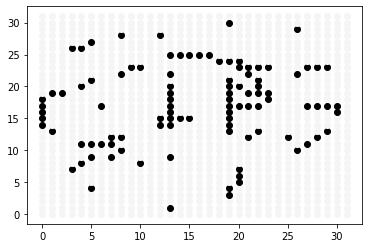

In [165]:
disp_pic(new_pic)

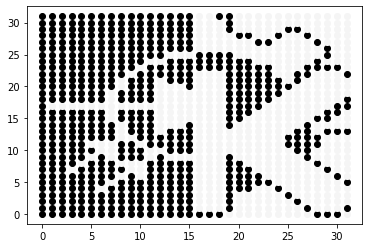

In [166]:
disp_pic(p11)

In [167]:
hop_net.pattern_dict

{0: array([[-1, -1, -1, ..., -1, -1, -1]]),
 1: array([[-1, -1, -1, ..., -1, -1, -1]]),
 2: array([[1, 1, 1, ..., 1, 1, 1]])}

In [68]:
def random_pic(number_of_pixels):
    pic = np.zeros([1, number_of_pixels])
    for i in range(number_of_pixels):
        pix = random.choice([-1,1])
        pic[0,i] = pix
    return pic
            

In [69]:
rand_pic = random_pic(1024)

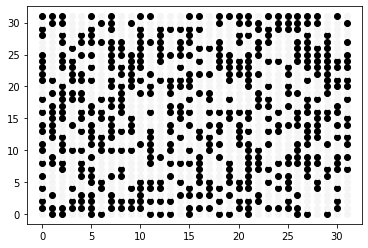

In [170]:
disp_pic(rand_pic)

Stable after 3. Did not change after last iteration.


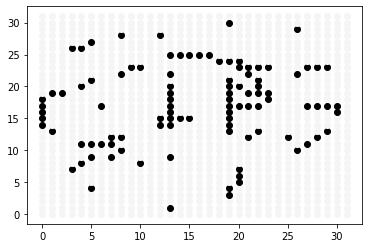

In [171]:
rand_pic = random_pic(1024)
new_pic = np.copy(hop_net.net_out(np.copy(rand_pic)))
disp_pic(new_pic)

Stable after 3. Did not change after last iteration.


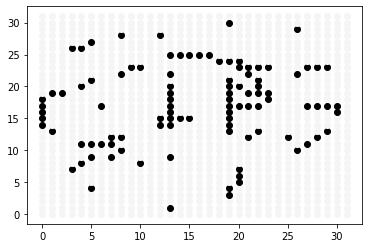

In [115]:
new_pic = np.copy(hop_net.net_out(np.copy(p10)))
disp_pic(new_pic)

In [222]:
hop_net.update_type = 'asyn'
new_pic = np.copy(hop_net.net_out(np.copy(p10)))

Reached maximum number of iterations.


In [219]:
hop_net.update_type = 'asyn'
new_pic = np.copy(hop_net.net_out(np.copy(rand_pic)))

Reached maximum number of iterations.


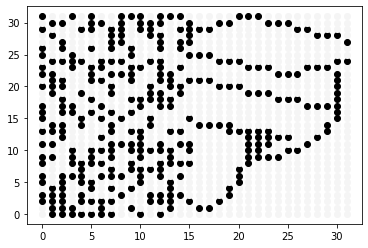

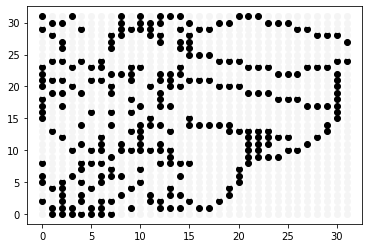

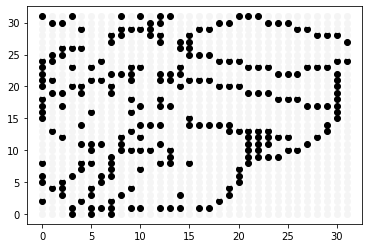

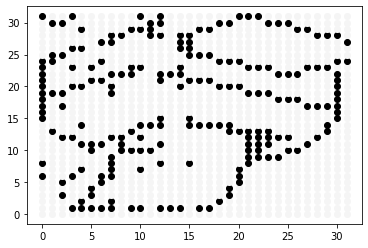

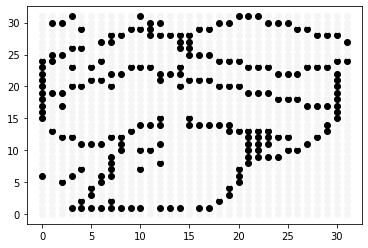

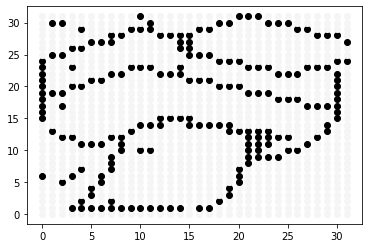

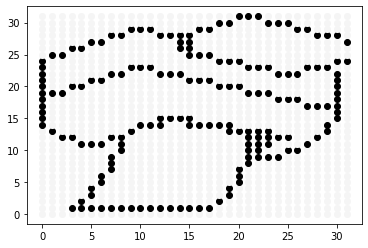

In [223]:
for pic in hop_net.store_updates:
    disp_pic(pic)
    plt.show()
disp_pic(new_pic)

# 3.3 Energy

In [168]:
hop_net_energy = Hopfield_Net(X)

In [169]:
hop_net_energy.attractor_dict

{0: array([[-1, -1, -1, ..., -1, -1, -1]]),
 1: array([[-1, -1, -1, ..., -1, -1, -1]]),
 2: array([[1, 1, 1, ..., 1, 1, 1]])}

In [170]:
hop_net_energy.update_type = 'asyn'
new_pic = np.copy(hop_net_energy.net_out(np.copy(p10)))

Reached maximum number of iterations.


Energy: 897.0063391893262


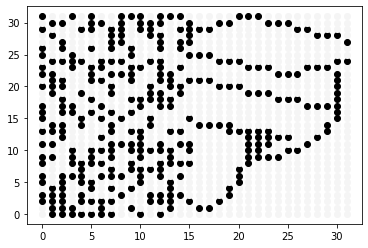

KeyboardInterrupt: 

In [159]:
for pic in hop_net_energy.store_updates:
    print("Energy: {}".format(hop_net_energy.energy(pic)))
    disp_pic(pic)
    plt.show()
print("Energy: {}".format(hop_net_energy.energy(new_pic)))
disp_pic(new_pic)

100%|██████████| 6/6 [00:04<00:00,  1.26it/s]


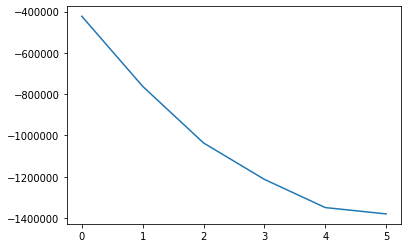

In [36]:
from tqdm import tqdm
energy_list = []
for i, update in tqdm(enumerate(hop_net_energy.store_updates)):
    energy = hop_net_energy.energy(update)
    energy_list.append(energy)
plt.plot(i_listenergy_list)

Text(0, 0.5, 'Energy')

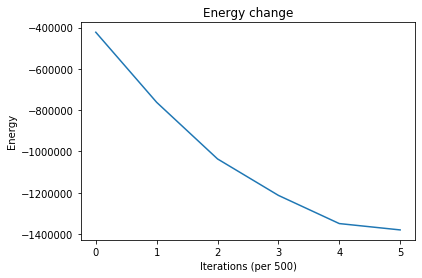

In [37]:
plt.plot(energy_list)
plt.title('Energy change')
plt.xlabel('Iterations (per 500)')
plt.ylabel('Energy')

In [229]:
hop_net_sym = Hopfield_Net(rand_pic.T)
hop_net_sym.W = 0.5*(np.copy(hop_net_sym.Wrand) + np.copy(hop_net_sym.Wrand).T)
hop_net_sym.update_type = 'syn'

hop_net_asym = Hopfield_Net(rand_pic.T)
hop_net_asym.W = np.copy(hop_net_asym.Wrand)
hop_net_asym.update_type = 'syn'

In [230]:
sym_pic = hop_net_sym.net_out(np.copy(p1))
asym_pic = hop_net_asym.net_out(np.copy(p1))

Reached maximum number of iterations.
Reached maximum number of iterations.


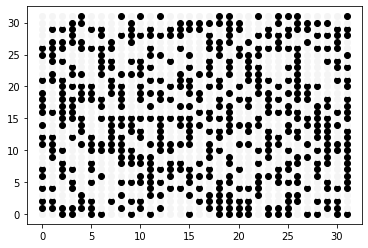

In [231]:
disp_pic(asym_pic)

100%|██████████| 12/12 [00:09<00:00,  1.28it/s]


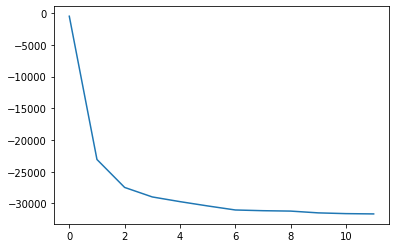

In [232]:
from tqdm import tqdm
sym_energy_list = []
for update in tqdm(hop_net_sym.store_updates):
    energy = hop_net_sym.energy(update)
    sym_energy_list.append(energy)
plt.plot(sym_energy_list)

100%|██████████| 12/12 [00:09<00:00,  1.29it/s]


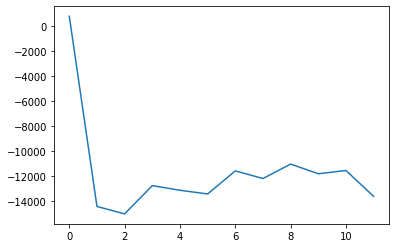

In [233]:
from tqdm import tqdm
asym_energy_list = []
for update in tqdm(hop_net_asym.store_updates):
    energy = hop_net_asym.energy(update)
    asym_energy_list.append(energy)
plt.plot(asym_energy_list)

In [116]:
hop_net_ran.W

array([[ 0.86234731, -0.22635304,  0.5592982 , ...,  0.09577395,
        -0.08965664,  0.77547875],
       [-0.53314702, -0.47765313,  0.99811089, ...,  0.9689526 ,
         1.25144206, -1.00621162],
       [ 0.10914115,  0.57758505, -0.94347043, ..., -0.55488918,
        -0.87857515, -0.8127091 ],
       ...,
       [ 0.38824628, -0.03393545, -0.08639645, ...,  0.940169  ,
         0.85657139,  0.33333062],
       [ 0.47375754, -0.73596325, -1.33336681, ...,  0.31336985,
        -1.29797385,  0.51788725],
       [-1.27910892,  0.71074184,  0.37196315, ..., -0.59693461,
        -0.40039089, -0.83565588]])

Reached maximum number of iterations.


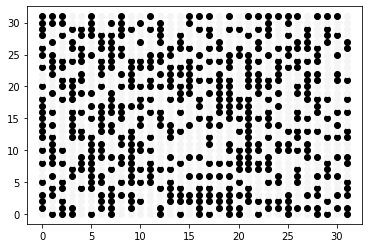

In [110]:
hop_net_ran.update_type = 'asyn'
new_pic = hop_net_ran.net_out(np.copy(p1))
disp_pic(new_pic)